In [1]:
import csv
import pandas as pd
import seaborn as sns

In [2]:
#datei vermisst deshalb nur test Datei
df = pd.read_csv('user_courses_review_test_set.csv')
df.describe(include='all')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   course_name     154 non-null    object
 1   lecture_name    154 non-null    object
 2   review_rating   154 non-null    int64 
 3   review_comment  150 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.9+ KB


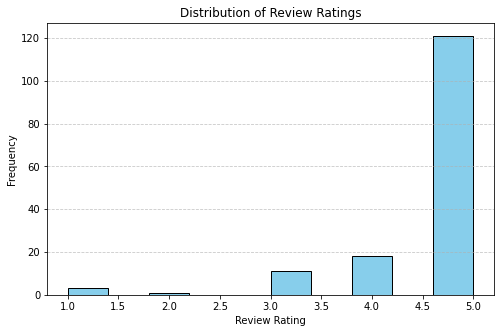

In [3]:
#bewertung plotten
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.hist(df['review_rating'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Review Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Review Ratings')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [4]:
#Korrelationen zwischen review_rating und die Länge des review_comments
from scipy.stats import pearsonr

# die NaN Werte ersetzen
df['review_comment'] = df['review_comment'].fillna('')  

# die Länge jedes review_comments berechnen
df['review_comment_length'] = df['review_comment'].apply(len)

# die LKorrelation berechnen
correlation, p_value = pearsonr(df['review_rating'], df['review_comment_length'])

#es gibt eine negative Korrelation, trotzdem ist der Wert nicht bedeutend
correlation, p_value

(-0.13097697840865802, 0.10542105223526944)

In [5]:
#reg ex benutzen um der Kurs mit den meisten positiven Bewertung herauszufinden

import re

# ein list von positiven Wörtern definieren
positive_words = ['good', 'excellent', 'amazing', 'great', 'fantastic', 'awesome', 'love']

# regex Muster erstellen (ignoriert Groß- und Kleinschreibung)
positive_pattern = re.compile(r'\b(' + '|'.join(positive_words) + r')\b', flags=re.IGNORECASE)

# eine neue Spalte erstellen, die angibt, ob ein review positiv ist
df['positive_review'] = df['review_comment'].apply(lambda x: bool(positive_pattern.search(x)))

# positive Bewertungen filtern
positive_reviews = df[df['positive_review']]

# positive Bewertungen zählen pro Kurs
positive_review_counts = positive_reviews['course_name'].value_counts()


positive_review_counts.sort_values(ascending=False)
positive_review_counts

Introduction to Data and Data Science                      25
Statistics                                                  8
SQL                                                         5
Introduction to Python                                      5
Introduction to Excel                                       5
Intro to NLP for AI                                         4
Introduction to Jupyter                                     3
Intro to ChatGPT and Generative AI                          3
Who Does What in Finance                                    3
Intermediate Python Programming                             2
Data Literacy                                               2
Power BI                                                    2
Python Programmer Bootcamp                                  2
How to Think Like a Data Scientist to Become One            1
Data Strategy                                               1
Convolutional Neural Networks with TensorFlow in Python     1
Masterin

naive bayes ist "naive" weil sie geht davon aus, dass die Ereignisse sind unabhängig

### multinomial naive bayes
die Häufigkeit von Wörtern wird als Features verwendet
### bernoulli naive bayes
die Häufigkeit ist irrelevant


In [6]:
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from nltk.corpus import stopwords
import nltk

# Stopwörter herunterladen
nltk.download('stopwords')

#Schritt 1: Textvorverarbeitung
def preprocess_text(text):
    # konvertieren in Kleinbuchstaben
    text = text.lower()
    # Satzzeichen entfernen
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Stopwörter entfernen
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# preprocessing auf die 'review_comment' Spalte anwenden
df['review_comment'] = df['review_comment'].apply(preprocess_text)

# Schritt 2: Featureextraktion
# konvertieren Textdaten mithilfe des CountVectorizer in eine bag-of-word-Darstellung 
vectorizer = TfidfVectorizer(stop_words='english') 
#Tfid gewichtet Wörter nach ihrer Häufigkeit in einem Dokument und Seltenheit in allen Dokumenten
#reduziert den Einfluss von häufigen Wörtern z.B. "the" und "is"
X = vectorizer.fit_transform(df['review_comment'])  # Features (bag-of-words)
y = df['review_rating']  

# Schritt 3: Train-Test spaltung
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Schritt 4: Modell Tranieren
model = MultinomialNB()
model.fit(X_train, y_train)

# Schritt 5: Modell Auswerten
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\test\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.6774193548387096

Classification Report:
               precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         6
           5       0.68      1.00      0.81        21

    accuracy                           0.68        31
   macro avg       0.17      0.25      0.20        31
weighted avg       0.46      0.68      0.55        31



c:\Users\test\anaconda3\envs\bike\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\test\anaconda3\envs\bike\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\test\anaconda3\envs\bike\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report zeigt für jede Klasse:
1. $ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} $

    je höher desto weniger falsch positive Fehler

2. $ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} $

    = Sensitivity, je höher desto weniger falsch negative Fehler
3. $ \text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} $

    je höher desto besser Ausgleich

4. Support: Anzahl der Stichproben

Gesamtmetriken: 
1. $ \text{Accuracy} = \frac{\text{Anzahk der richtigen Vorhersagen}}{\text{Gesamtzahl der Vorhersagen}} $

2. Macro Average: ungewichtete Durchschnitt von precision, recall und f1 über alle Klassen

3. Weighted Average: der Durchschnitt von precision, recall und f1 gewichtet nach der Anzahl der Stichprobe in jeder Klasse

das Ergebinis zeigt starkes Ungleichgewicht zwichen den Klassen, möglicherweise wegen der Mangel an Stichproben. Um die Leistung zu verbessern, wir können die folgendes versuchen.
1. Resampling:
    1. Oversampling: verwenden die Minderheitsstichproben mehrmals, aber es kann zu Overfitting führen
    2. Undersampling: verringen die  Mehrheitsstichproben, aber es kann Stichproben verschwenden
    3. SMOTE (Synthetic Minority Oversampling Technique): Stichproben für Minderheit erstellen mit kleiner Veränderung

2. Data Augmentation: Macht kleine Änderung zu Datei um neue Datei zu erstellem und die Datei zu erweiten. z.B. Drehung, umdrehung oder Vergrößen für Bilddatei oder Synonymen und Paraphrasierungen in Textdaten.

3. Gewichtete ML Algorithmus verwenden
    1. Einleitung von Support vector maschine, durch die Zuweisung unterschiedlicher Kassengewichte wird das Modellempfindlicher gegenüber der Minderheitsklasse.
    2. In bezug auf Desicion Tree, kann man die Aufteilungskriterien anpassen

In [ ]:
#Oversampling
from sklearn.utils import resample
from sklearn.pipeline import make_pipeline

clean_data=df.copy()
# Separate the majority and minority classes
df_majority = clean_data[clean_data.review_rating == 5]
df_minority = clean_data[clean_data.review_rating < 5]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=42) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled.review_rating.value_counts()

# Split the upsampled data into features (X) and target label (y)
X_upsampled = df_upsampled['review_comment']
y_upsampled = df_upsampled['review_rating']

# Split the upsampled data into training and testing sets
X_train_upsampled, X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(
    X_upsampled, y_upsampled, test_size=0.2, random_state=42)

# Train the model with the upsampled training data
text_clf_upsampled = make_pipeline(vectorizer, model)
text_clf_upsampled.fit(X_train_upsampled, y_train_upsampled)

# Predict the categories of the upsampled test data
y_pred_upsampled = text_clf_upsampled.predict(X_test_upsampled)

# Calculate the classification report for the upsampled data
accuracy_score(y_test_upsampled, y_pred_upsampled)

0.7755102040816326